## Overview

In general, when we fit a Decision Tree, we run the risk of putting together a model with extremely-high variance-- the tree that winds up being fit is *highly* dependent on how we split our data into train/test.

The following sections present methods for overcoming this shortcoming by building *many* different Decision Trees and leveraging them together for prediction. As outlined [in our discussion of Boostrapping](https://napsterinblue.github.io/notes/machine_learning/validation/bootstrap/), we can counter this variance by aggregating our relevant statistics many times.

This is the fundamental idea to this notebook and each section builds on that a little more.

### Bagging

As mentioned above, Bootstrapping gives us a powerful tool for generating robust models from multiple repeated samples of simpler models.

The same can be said for Decision Trees. Except in this case, instead of aggregating summary statistics, we make an *aggregate prediction* for a given value `X`, using our various tree predictions, `f_hat^b`. In fact, the term "bagging" is a sort of portmanteau of "bootstrap" and "aggregating".

Concretely, the prediciton on a given `X` looks like this:

$\hat{f}(X) = \frac{1}{B} \sum_{b=1}{B}\hat{f}^b(X)$

for the Regression case, and a majority vote when we do Classification.

#### Out-Of-Bag Error

As mentioned in the notebook on Bootstrapping, if we Bootstrap `n` samples on a dataset of size `n`, we've got about a 2/3 chance of seeeing any data point.

This elegant property is also very convenient, as it allows us to examine a natural holdout set if we just do a set-diff between values that we trained Trees on and those we didn't.

### Random Forests

One shortcoming of the Bagging method is that the Trees that we produce are highly-correlated with one another. Sure, we overcome some of the variance due to the ~2/3 property, but with enough data, each tree will likely devise similar splits on similar attributes.

The *Random Forest* algorithm corrects for this by *only allowing a random sample of `m` predictors* to be considered in the construction of any Tree. They show empirically in ISL that choosing `m=sqrt(p)` is often optimal.

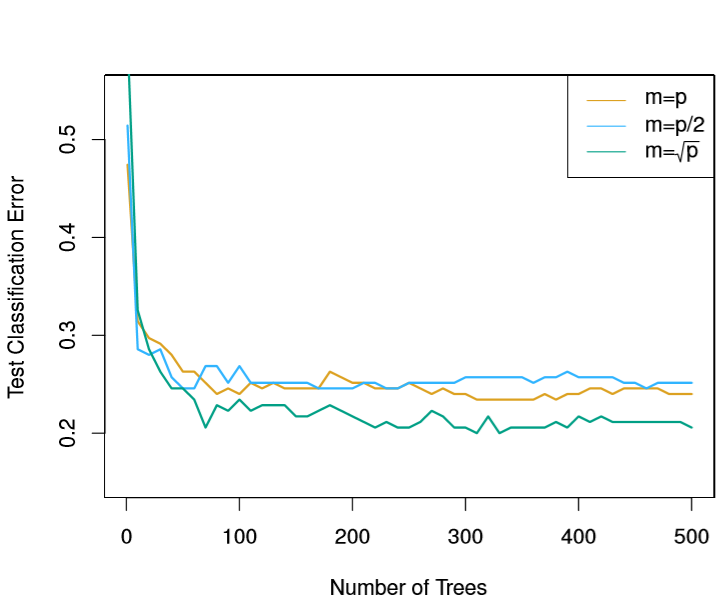

In [1]:
from IPython.display import Image

Image('images/rand_forest_m.PNG')

Borrowing their explanation:

>This may sound crazy, but it has a clever rationale. Suppose that there is one very strong predictor in the data set, among a number of moderately strong predictors. Then in the collection of bagged trees, most or all of the trees will use this strong predictor in the top split. Consequently, all of the bagged trees will look quite similar to each other.

#### Interpretability Tradeoff

One thing that bears mentioning that while these Aggregated Models have a competitive edge over Decision Trees by lowering the variance, they aren't as effective in the way of interpretability.

Whereas you could literally trace the decision of any `X` in a Decision Tree, it's hardly feasible or intuitive to try and simultaneously repeat the exercise for arbitrarily-many Trees in the case of RF or Bagging.

Instead, what we can use is a "Variable Importance" Metric, which is basically a measure of the information gain due to splits on a given feature.

- In Regression Problems, we look at reduction in RSS
- In Classificaiton, Decreases in the Gini Index

Tracking this value for every feature of every Tree sounds like a tedious feat, but is often readily available in libraries with `RandomForest` implementations.

### Boosted Trees

As outlined in [our notebook on Boosted Methods](https://napsterinblue.github.io/notes/machine_learning/model_selection/boosting), we can fit increasingly-informative Decision Trees using a Boosting scheme.

In the last section of that notebook, we discuss a couple hyperparameters, taking `d`, the tree-depth, as a given. A few thoughts on selecting the right value:

- The whole point of Boosting/Bagging/Random Forests is to allow increasing complexity by the aggregation of many, simpler models
- Thus, a small value of `d` is most appropriate, especially with random feature consideration and training data sampling-- the deeper `d` is allowed ot be, the more likely it is that you're going to wind up basically seeing the same `n` features calling the shots in your models
- Finally, the example that ISL shares shows that `d=1` is the optimal value for their dataset, but this all depends. In general, *`d` should be considered a mechanism for allowing interaction terms*. Think about it-- if you have two feature where Interaction is appropriate/gives a lot of predictive power, then splitting on the first and then the second is essentially the same as considering each data point `X` as a joint function of those features.